# Project: No-show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analyzing data which factors could be used to predict if patients will show up for their scheduled appointment or not. We will compared patient characteristics such as gender, age, underlying diseases,etc. to see the difference between the patients who show up and did not show up for thier appointments.

<a id='intro'></a>
## Questions

1. Is gender affecting patients absences?
2. How is age affecting patients absence? (Age group classification)
3. Is scholarship affecting patients absence? 
4. Do SMS reminders reduces the number of patients absence?
5. Are no-show appointments associated with a certain day of week? 
6. Is the waiting period between schedule day and appointment day affecting the number of absence?
7. Are the underlying diseases (hypertension, diabetes,alcoholism,handicap) affecting the number of no-show appointments?


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>I will check the shape, information, and duplication to get some idea from data. 

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
sum(df.duplicated())

0

In [64]:
df.isnull().values.any()

False

> It could be seen that there are 110527 rows without missing value. In addtion, there are no duplicated file in this data. However, it seems to have an abnormal value such as min(age) = -1.  The column names are also misspelling. 

### Data Cleaning 

>According to the table, the column name will be rename into lower capital and replace "-" due to easier for coding. There are also some misspelling which will be corrected. 

In [7]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [8]:
df.rename(index=str, columns={"hipertension": "hypertension", "handcap": "handicap"}, inplace = True)

>There are 7 factors that will be analyzed to find trends of patients who missed the appointment:

>>1. Gender
2. Age
3. The day of week
4. Waiting time (Different between scheduled day and appointment day)
5. Scholarship
6. Sms received
7. Underlying diseases

>However, I decide to categorised the following factors : age,the day of week, waiting time, and underlying diseases. Before droping unnesessary columns, I will analyzed those data and create the new important factors.

#### Grouping Age

In [9]:
# Let's see the unique value of age.
np.sort(df.age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [10]:
# Choosing only a normal data: age >=0
df = df[df.age >=0]

In [11]:
## due to hugh age gap, I will group patient age into age category.
def age_groups(age):
    if age >= 76:
        return 'above 75'
    elif age >= 61:
        return 'age 61-75'
    elif age >= 46:
        return 'age 46-60'
    elif age >= 31:
        return 'age 31-45'
    elif age >= 16:
        return 'age 16-30'
    else:
        return 'under 15'

In [12]:
## Create a new column 'age_group'
df.loc[:, 'age_group']= df['age'].aggregate(age_groups)

#### The day of week
>I need to change data type of appointmentday into datetime so I can used the method dt.day_name to identify the day of week. Then, create the new column 'day_of_week'

In [13]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['day_of_week'] = df['appointmentday'].dt.day_name()

#### Waiting time
>How long patients need to wait for thier appointments may also affect No-shows in appointment scheduling. I will calculate the differences and group them into waiting periods for an appointment.

In [14]:
# Set scheduled day and appointment day into the same data type
df.scheduledday = df.scheduledday.astype(np.datetime64)
df.scheduledday = df.scheduledday.dt.date
df.appointmentday = df.appointmentday.astype(np.datetime64)
df.appointmentday = df.appointmentday.dt.date

In [15]:
# Create the new column 'waiting_time'
df['waiting_time']= df.appointmentday - df.scheduledday

In [16]:
#Check abnormal value
df.waiting_time.describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: waiting_time, dtype: object

> The minimum is -6 which is an abnormal value.

In [17]:
#  It is impossible that result is minus so I will choose only waiting time >= 0 
df = df[df.waiting_time >= np.timedelta64(0, 'D')]

In [18]:
#Due to long range time of waiting, data will be group into month.
def waitingtime_groups(wait):
    if wait >= np.timedelta64(151, 'D'):
        return 'more than 5 months'
    elif wait >= np.timedelta64(121, 'D'):
        return '5 months'
    elif wait >= np.timedelta64(91, 'D'):
        return '4 months'
    elif wait >= np.timedelta64(61, 'D'):
        return '3 months'
    elif wait >= np.timedelta64(31, 'D'):
        return '2 months'
    else:
        return '1 month'

In [19]:
df.loc[:, 'waiting_period'] = df['waiting_time'].aggregate(waitingtime_groups)

#### Underlying diseases
>I want to know between the patients who have underlying diseases and who are healthy, which group tend to no show on an appointment.
>I assume handicap it is also a underlying disease.

In [20]:
# I want to know between the patients who have underlying diseases and who are healthy, which group tend to no show on an appointment.
# I assume handicap it is also a underlying disease.
def sum_dz(df):
    sum_column = df.loc[: , ['hypertension', 'diabetes', 'alcoholism', 'handicap']].sum(1)
    return df.assign(sum_dz = sum_column)

In [21]:
# Then, I'll be grouping into 2 groups: Yes refers to a patient who has any underlying diseases, No refers to a patients who has no underlying diseases
def underlying_group(sum_dz):
    if sum_dz == 0:
        return 'No'
    else:
        return 'Yes'
df = sum_dz(df)

In [22]:
df.loc[:, 'underlying_dz'] = df['sum_dz'].aggregate(underlying_group)

> Let's check the new columns

In [23]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,day_of_week,waiting_time,waiting_period,sum_dz,underlying_dz
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,age 61-75,Friday,0 days,1 month,1,Yes
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,age 46-60,Friday,0 days,1 month,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,age 61-75,Friday,0 days,1 month,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,under 15,Friday,0 days,1 month,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,age 46-60,Friday,0 days,1 month,2,Yes


> Drop columns that will not be used in analyzing

In [24]:
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'neighbourhood', 'age', 'sum_dz', 'waiting_time', 'hypertension', 'diabetes', 'alcoholism', 'handicap'], axis = 1, inplace = True)

In [25]:
# The new table
df.head(5)

,gender,scholarship,sms_received,no_show,age_group,day_of_week,waiting_period,underlying_dz
0,F,0,0,No,age 61-75,Friday,1 month,Yes
1,M,0,0,No,age 46-60,Friday,1 month,No
2,F,0,0,No,age 61-75,Friday,1 month,No
3,F,0,0,No,under 15,Friday,1 month,No
4,F,0,0,No,age 46-60,Friday,1 month,Yes


<a id='eda'></a>
## Exploratory Data Analysis


In [26]:
# Set show and no show variables
show = df.no_show == "No" 
noshow =  df.no_show == "Yes"

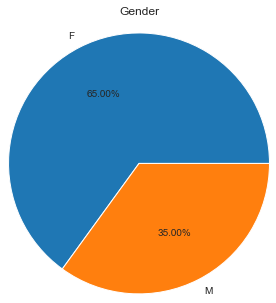

In [27]:
# Before running the graph, let's check the number of gender variables:
count_gender = df.gender.value_counts()
count_gender.plot(kind="pie", autopct='%1.2f%%', radius = 1.5)
plt.title("Gender", pad=40)
plt.ylabel("");

> This big difference can affects the outcomes if we compare them by count. Thus, I will compare each factor in proportion because the number of  data in each groups (i.e numbers of female and male patients) are not equal.

### 1. Relationship on Gender with No-show

In [51]:
percent_gender_noshow = df.gender[noshow].value_counts() / df.gender.value_counts() *100
percent_gender_show = df.gender[show].value_counts() / df.gender.value_counts() *100
print('percent_gender_noshow: \n{}\n'.format(percent_gender_noshow))
print('percent_gender_show: \n{}'.format(percent_gender_show))

percent_gender_noshow: 
F    20.311543
M    19.963810
Name: gender, dtype: float64

percent_gender_show: 
F    79.688457
M    80.036190
Name: gender, dtype: float64


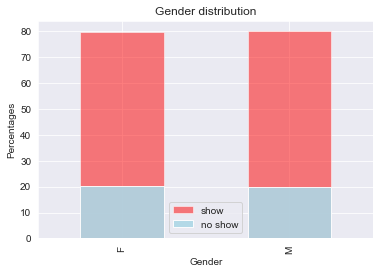

In [29]:
percent_gender_show.plot(kind = 'bar', alpha = 0.5, color = 'red', label = 'show')
percent_gender_noshow.plot(kind = 'bar', alpha = 0.9, color = 'lightblue', label = 'no show')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Percentages')
plt.legend();

> The proportion of no-show group between Female and Male is almost equal. Thus, the gender factor is not significant enough to be considered as a important variable.

### 2. Relationship on Age Group with No-show

In [52]:
percent_age_noshow = df.age_group[noshow].value_counts() / df.age_group.value_counts() *100
percent_age_show = df.age_group[show].value_counts() / df.age_group.value_counts() *100
print('percent_age_noshow: \n{}\n'.format(percent_age_noshow))
print('percent_age_show: \n{}'.format(percent_age_show))

percent_age_noshow: 
above 75     16.119458
age 16-30    24.762535
age 31-45    21.368378
age 46-60    17.822167
age 61-75    14.864301
under 15     21.445212
Name: age_group, dtype: float64

percent_age_show: 
under 15     78.554788
age 46-60    82.177833
age 31-45    78.631622
age 16-30    75.237465
age 61-75    85.135699
above 75     83.880542
Name: age_group, dtype: float64


In [31]:
# Ordered the age group
percent_age_noshow = percent_age_noshow[['under 15', 'age 16-30', 'age 31-45', 'age 46-60', 'age 61-75', 'above 75']]
percent_age_show = percent_age_show[['under 15', 'age 16-30', 'age 31-45', 'age 46-60', 'age 61-75', 'above 75']]

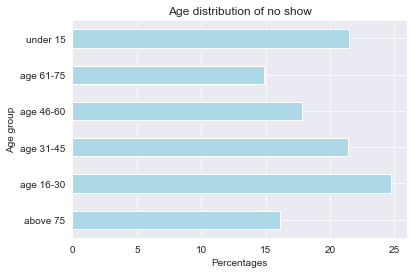

In [54]:
percent_age_noshow.plot(kind = 'barh', alpha = 1, color = 'lightblue')
plt.title('Age distribution of no show')
plt.xlabel('Percentages')
plt.ylabel('Age group');

> From the graph above, it could be seen that age 16-30 has the highest percentages of no-show for an appointment. The second and the third highest percentages are under 15, and 31-45 respectively. 

### 3. Relationship on Scholarship with No-show

In [55]:
percent_scholarship_noshow = df.scholarship[noshow].value_counts() / df.scholarship.value_counts() *100
percent_scholarship_show = df.scholarship[show].value_counts() / df.scholarship.value_counts() *100
print('percent_scholarship_noshow: \n{}\n'.format(percent_scholarship_noshow))
print('percent_scholarship_show: \n{}'.format(percent_scholarship_show))

percent_scholarship_noshow: 
0    19.803331
1    23.736304
Name: scholarship, dtype: float64

percent_scholarship_show: 
0    80.196669
1    76.263696
Name: scholarship, dtype: float64


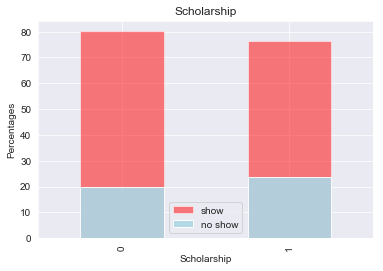

In [34]:
percent_scholarship_show.plot(kind = 'bar', alpha = 0.5, color = 'red', label = 'show')
percent_scholarship_noshow.plot(kind = 'bar', alpha = 0.9, color = 'lightblue', label = 'no show')
plt.title('Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Percentages')
plt.legend();

> Patients who has scholarship tend to miss thier appointment more than the patients who do not have scholarship.

### 4. Relationship on Sms Received with No-show

In [56]:
percent_smsreceived_noshow = df.sms_received[noshow].value_counts() / df.sms_received.value_counts() *100
percent_smsreceived_show = df.sms_received[show].value_counts() / df.sms_received.value_counts() *100
print('percent_smsreceived_noshow: \n{}\n'.format(percent_smsreceived_noshow))
print('percent_smsreceived_show: \n{}'.format(percent_smsreceived_show))

percent_smsreceived_noshow: 
0    16.697984
1    27.574545
Name: sms_received, dtype: float64

percent_smsreceived_show: 
0    83.302016
1    72.425455
Name: sms_received, dtype: float64


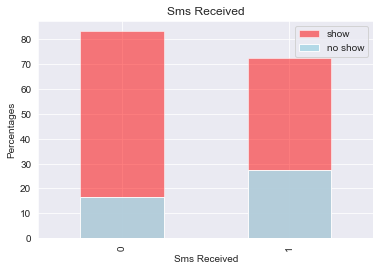

In [36]:
percent_smsreceived_show.plot(kind = 'bar', alpha = 0.5, color = 'red', label = 'show')
percent_smsreceived_noshow.plot(kind = 'bar', alpha = 0.9, color = 'lightblue', label = 'no show')
plt.title('Sms Received')
plt.xlabel('Sms Received')
plt.ylabel('Percentages')
plt.legend();

> It is surprisingly that received sms group is more significant  no-show on thier appointment than the other group.

### 5. Relationship on Day of week with No-show

In [37]:
percent_day_noshow = df.day_of_week[noshow].value_counts() / df.day_of_week.value_counts() *100
percent_day_show = df.day_of_week[show].value_counts() / df.day_of_week.value_counts() *100

In [38]:
# Ordered the day of week
percent_day_noshow = percent_day_noshow[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]
percent_day_show = percent_day_show[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

In [50]:
print('percent_day_of_week_noshow: \n{}\n'.format(percent_day_noshow))
print('percent_day_of_week_show: \n{}'.format(percent_day_show))

percent_day_of_week_noshow: 
Monday       20.644565
Tuesday      20.087370
Wednesday    19.686074
Thursday     19.349414
Friday       21.226142
Saturday     23.076923
Name: day_of_week, dtype: float64

percent_day_of_week_show: 
Monday       79.355435
Tuesday      79.912630
Wednesday    80.313926
Thursday     80.650586
Friday       78.773858
Saturday     76.923077
Name: day_of_week, dtype: float64


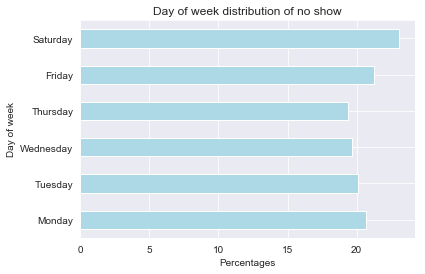

In [58]:
percent_day_noshow.plot(kind = 'barh',alpha = 1, color = 'lightblue')
plt.title('Day of week distribution of no show')
plt.xlabel('Percentages')
plt.ylabel('Day of week');

In [41]:
# Before we concluded that Saturday is the day patients will not show on appointment the most, lest's check the number of appointments in each day
count_day_of_week = df.day_of_week.value_counts()

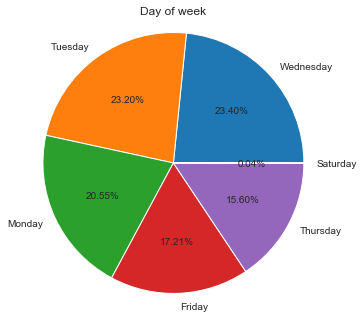

In [42]:
# Make a pie chart
count_day_of_week.plot(kind="pie", autopct='%1.2f%%', radius = 1.5)
plt.title("Day of week", pad=40)
plt.ylabel("");

> It could be seen that there is only 0.04% appointments on Saturday so it should not be included in this summary.
From the day of week distribution graph, People who have appiontment on Friday tends to no show up than the other days. However, it seems not significant enough to considered as important factor. 

### 6. Relationship on Waiting time with No-show

In [43]:
percent_waiting_noshow = df.waiting_period[noshow].value_counts() / df.waiting_period.value_counts() *100
percent_waiting_show = df.waiting_period[show].value_counts() / df.waiting_period.value_counts() *100

In [44]:
# Ordered the waiting time
percent_waiting_noshow = percent_waiting_noshow[['1 month', '2 months', '3 months', '4 months', '5 months', 'more than 5 months']]
percent_waiting_show = percent_waiting_show[['1 month', '2 months', '3 months', '4 months', '5 months', 'more than 5 months']]

In [59]:
print('percent_waiting_period_noshow: \n{}\n'.format(percent_waiting_noshow))
print('percent_waiting_period_show: \n{}'.format(percent_waiting_show))

percent_waiting_period_noshow: 
1 month               18.862027
2 months              34.154292
3 months              28.753994
4 months              20.454545
5 months              37.931034
more than 5 months    32.142857
Name: waiting_period, dtype: float64

percent_waiting_period_show: 
1 month               81.137973
2 months              65.845708
3 months              71.246006
4 months              79.545455
5 months              62.068966
more than 5 months    67.857143
Name: waiting_period, dtype: float64


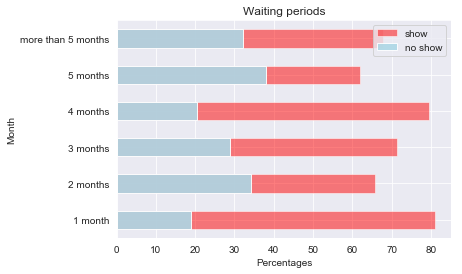

In [60]:
percent_waiting_show.plot(kind = 'barh', alpha = 0.5, color = 'red', label = 'show')
percent_waiting_noshow.plot(kind = 'barh', alpha = 0.9, color = 'lightblue', label = 'no show')
plt.title('Waiting periods')
plt.xlabel('Percentages')
plt.ylabel('Month')
plt.legend();

In [47]:
# Before we concluded that 5 months is the time period patients will not show on appointment the most, lest's check the number of appointments in each group.
df.waiting_period.value_counts()

1 month               100143
2 months                8283
3 months                1878
4 months                 132
more than 5 months        56
5 months                  29
Name: waiting_period, dtype: int64

> Similar to the day of week, the number of waiting 5 months is very small. Thus, the waiting time that make people more missing appointment is 2 months.

### 7. Relationship on Underlying Diseases with No-show

In [61]:
percent_underlying_dz_noshow = df.underlying_dz[noshow].value_counts() / df.underlying_dz.value_counts() *100
percent_underlying_dz_show = df.underlying_dz[show].value_counts() / df.underlying_dz.value_counts() *100
print('percent_underlying_dz_noshow: \n{}\n'.format(percent_underlying_dz_noshow))
print('percent_underlying_dz_show: \n{}'.format(percent_underlying_dz_show))

percent_underlying_dz_noshow: 
No     20.92473
Yes    17.84930
Name: underlying_dz, dtype: float64

percent_underlying_dz_show: 
No     79.07527
Yes    82.15070
Name: underlying_dz, dtype: float64


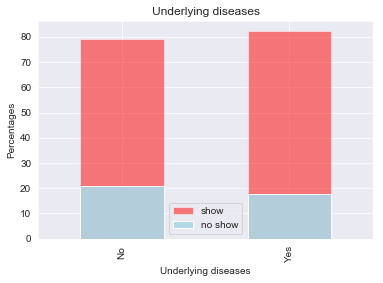

In [62]:
percent_underlying_dz_show.plot(kind = 'bar', alpha = 0.5, color = 'red', label = 'show')
percent_underlying_dz_noshow.plot(kind = 'bar', alpha = 0.9, color = 'lightblue', label = 'no show')
plt.title('Underlying diseases')
plt.xlabel('Underlying diseases')
plt.ylabel('Percentages')
plt.legend();

> The patients who have underlying diseases are less show-up for thier appointments.

<a id='conclusions'></a>
## Conclusions


Results: Our data suggest that
1. There is no big difference between the gender of patients who show up and the patients who did not show up for the appointment.
2. Comparing to other age group classification, age 16-30 is more likely to be absence on thier appointments. The second and the third are under 15, and 31-45 respectively. So it may say that the youngers seems to no-show on appointment more than the elderly.
3. The patients who are in scholarship program tend to not show up on thier appointment.
4. SMS reminders do not help patients more likely to show up on thier appointment.
5. There is no significant value to conclude that the day of week affect the patients absence.
6. There are big different in the value count of waiting periods. It is hardly to compare them dur to the size may affect the result. However, waiting 2 months is likely to make the patients do not show up on appointment date.
7. Patients who have a underlying disease are about 3% less likely to miss thier appointments than the patients who do not have a underlying disease.

Limitations: There are a couple of limitations with our data:
1. The details of informations are not provided. For example, the time of appointment date which may affect the patients show up. Or what a present illness that patients need to consult a doctor. For example, the patient may have a fever. The symptom may get better before the schedule date so a patient turn out to no-show on appointment.
2. Most of our value are categorical so it cannot show the strong correlation between factors.